### Optimizatin Problem:
  - minimize     :  $w^TVw$
  - subject to   
    - $m^Tw \geq r_m$
    - $1^Tw = 1$
    - $w \succeq 0$

In [189]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as sp

In [193]:
class portfolioOptimize:
    def __init__(self, m, V, r_m):
        self.m = m
        self.V = V
        self.r_m = 0
        
        self.eq_cons = {
            'type' : 'eq',
            'fun'  : lambda x: sum(x) - 1
#             'jac'  : lambda x: np.array([1 for i in range(len(x))])
        }
        
        self.ineq_cons = {
            'type': 'ineq', 
            'fun' : lambda x: m.T @ x - r_m
#             'jac' : lambda x: np.array(m.T[0].copy())
        }
        
        self.x0 = np.random.rand(20, 1)
        self.x0 /= sum(self.x0)
    
    def risk(self, w):
        return w.T @ V @ w
    
    def jacRisk(self, w):
        return 2 * (V @ w)
    
    def optimize(self):
        
        res = sp.minimize(self.risk,
                           self.x0,
                           method='SLSQP',
                           jac=self.jacRisk, 
                           constraints=[self.eq_cons, self.ineq_cons],
                           options={'ftol': 1e-9, 'disp': True},
                           bounds=sp.Bounds(0, 1))
        return res.x
    

In [194]:
m = np.random.rand(20, 1)
V = np.random.rand(20, 20)
V = np.dot(V, V.transpose())
r_m = 0

In [195]:
pOptimize = portfolioOptimize(m, V, r_m)

In [196]:
inves = pOptimize.optimize()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9248684444588613
            Iterations: 9
            Function evaluations: 10
            Gradient evaluations: 9


In [200]:
rs = np.linspace(0, 2, 20)
risk = []
for r in rs:
    pOptimize = portfolioOptimize(m, V, r)
    w = pOptimize.optimize()
    risk.append(pOptimize.risk(w))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9248684444555497
            Iterations: 8
            Function evaluations: 9
            Gradient evaluations: 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.924868444468354
            Iterations: 9
            Function evaluations: 10
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9248684444564934
            Iterations: 9
            Function evaluations: 10
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.924868444456634
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9248684444554454
            Iterations: 8
            Function evaluati

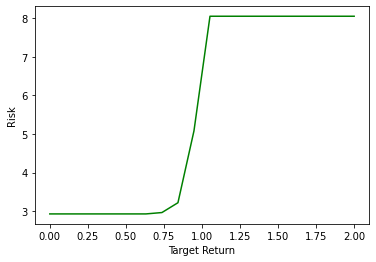

In [202]:
plt.plot(rs, risk, 'g')
plt.xlabel('Target Return')
plt.ylabel('Risk')
plt.show()